# **Pydicom**

## **Instalando Pydicom**

### Importar la librería

In [1]:
import pydicom
import matplotlib.pyplot as plt

In [62]:
from pydicom.data import get_testdata_file
from pydicom import dcmread
fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

## Leer archivos DICOM

In [63]:
#Leer un archivo dicom
dcm_data = pydicom.dcmread(r'C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 3\Trabajo unidad 3\Pacientes\RCXTEI_Anonymous\EstudiosDICOM\MR_CEREBRO SIMPLE_20230403\IMG0202.dcm')
dcm_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 254
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.43985544867080153716631222606537722
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.9.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.9'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.4398554486708015371663122

In [4]:
# Extraer el nombre del paciente usando su etiqueta DICOM única (0010, 0010)
dcm_data[0x0010 , 0x0010]

(0010, 0010) Patient's Name                      PN: 'C3N-00247'

In [65]:
# Extraer el nombre del paciente.
nombre_paciente = dcm_data.PatientID
nombre_paciente

'NAN'

In [6]:
# Extraer el nombre del paciente utilizando su etiqueta DICOM única (0010, 0010)
dcm_data[ 0x0010 , 0x0010 ].value

'C3N-00247'

## **Métodos para PyDicom DataSet**

## Método .keys()
El uso de .keys() devuelve la lista de claves del diccionario DataSet.

In [7]:
#Extraer las claves, las etiquetas DICOM, que están en un archivo DICOM
dcm_data.keys()

dict_keys([(0008, 0005), (0008, 0008), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1030), (0008, 103e), (0008, 1090), (0008, 1110), (0008, 1140), (0008, 2112), (0009, 0010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0010, 1010), (0010, 2160), (0012, 0050), (0012, 0051), (0012, 0062), (0012, 0063), (0012, 0064), (0013, 0010), (0013, 1010), (0013, 1013), (0018, 0015), (0018, 0050), (0018, 0060), (0018, 0090), (0018, 1020), (0018, 1030), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1200), (0018, 1201), (0018, 1210), (0018, 5100), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, 9323), (0018, 9324), (0018, 9345), (0019, 0010), (0019, 10b0), (0020, 000d), (0020, 00

## Método .values()
Este método devuelve una lista de los valores del diccionario DataSet. Es un poco voluminoso y no es preferible leerlo de esta forma.

Este método podría resultar útil para iterar sobre una lista de valores en algunos casos.

In [8]:
# Extraer los valores, los atributos DICOM, que están en un archivo DICOM
dcm_data.values()

dict_values([(0008, 0005) Specific Character Set              CS: 'ISO_IR 100', (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], (0008, 0016) SOP Class UID                       UI: CT Image Storage, (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055, (0008, 0020) Study Date                          DA: '20100227', (0008, 0021) Series Date                         DA: '20100227', (0008, 0022) Acquisition Date                    DA: '20100227', (0008, 0023) Content Date                        DA: '20100227', (0008, 0030) Study Time                          TM: '161937.171', (0008, 0031) Series Time                         TM: '162536.14', (0008, 0032) Acquisition Time                    TM: '162203.028699', (0008, 0033) Content Time                        TM: '162203.028699', (0008, 0050) Accession Number                    SH: '1598252606449858', (0008, 0060) Modality 

## Método .group_dataset()
Es posible que nos encontremos con muchos atributos que tengan el mismo primer número. Estas etiquetas, las que tienen una primera etiqueta común, normalmente describen un parámetro común.

Por ejemplo, los atributos con la primera etiqueta común (0x0010) normalmente se refieren a atributos relacionados con el paciente. Los atributos con la primera etiqueta (0x0028) describen los atributos de píxeles de imagen .

A veces resulta útil ver todos los atributos relacionados con un parámetro específico. El uso del método (.group_dataset) devuelve un conjunto de datos que contiene solo elementos de un determinado grupo.

In [9]:
# Extraiga los atributos relacionados con la etiqueta 0x0028, estos están relacionados con ImagePixel
dcm_data.group_dataset (0x0028)

(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: [0.564453125, 0.564453125]
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 12
(0028, 0102) High Bit                            US: 11
(0028, 0103) Pixel Representation                US: 0
(0028, 0106) Smallest Image Pixel Value          US: 0
(0028, 0107) Largest Image Pixel Value           US: 4095
(0028, 0303) Longitudinal Temporal Information M CS: 'MODIFIED'
(0028, 1050) Window Center                       DS: [-500, 40]
(0028, 1051) Window Width                        DS: [1500, 400]
(0028, 1052) Rescale Intercept                   DS: '-1024.0'
(0028, 1053) Rescale Slope                       DS: '1.0'
(0028, 1055) Window Center & Widt

## Método .dir()
Devuelve una lista alfabética de palabras clave de elementos en el conjunto de datos. Esta es una excelente opción para brindar una primera idea de los metadatos con los que está tratando.

In [10]:
# Una lista alfabética de las palabras clave de los elementos en el conjunto de datos DICOM.
dcm_data. dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CTDIvol',
 'ClinicalTrialTimePointDescription',
 'ClinicalTrialTimePointID',
 'Columns',
 'ContentDate',
 'ContentTime',
 'ConvolutionKernel',
 'DataCollectionDiameter',
 'DateOfLastCalibration',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'EstimatedDoseSaving',
 'EthnicGroup',
 'Exposure',
 'ExposureModulationType',
 'ExposureTime',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageComments',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'KVP',
 'LargestImagePixelValue',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'Pati

In [11]:
dcm_data.Modality

'CT'

Filtros

In [12]:
# Extraer todos los atributos que tengan "Pixel" en sus palabras clave
dcm_data.dir( 'Pixel' )

['LargestImagePixelValue',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'SamplesPerPixel',
 'SmallestImagePixelValue']

**Atributos para PyDicom DataSet**

Pixel array: Extrae los píxeles de la imagen

In [44]:
# Píxeles de la imagen
dcm_data.pixel_array.shape

(512, 512)

## Gráficos usando matplotlib

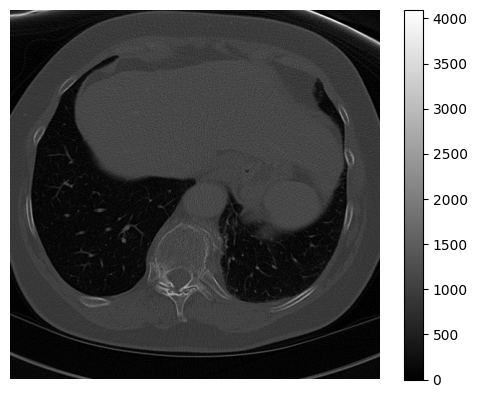

In [14]:
# Representación de la imagen
im = dcm_data.pixel_array
plt.imshow(im, cmap= 'gray' )
plt.axis( 'off' )
# plt.title( 'Corte axial de una TC de tórax' )
plt.colorbar()
plt.show()

### **Acceder a los valores del DataElement**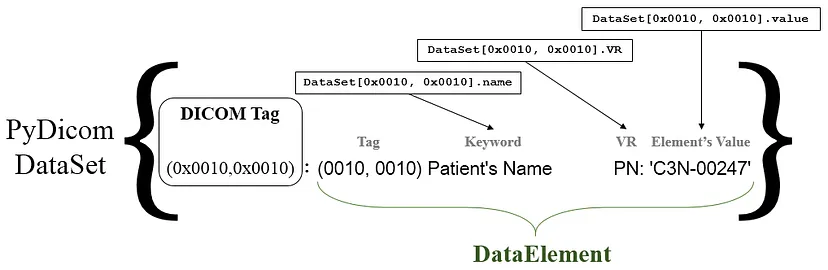

In [15]:
# Devuelve la palabra clave del elemento (si se conoce) como str
kwrds = dcm_data[ 0x0010 , 0x0010 ].keyword

# Devuelve el nombre del diccionario DICOM para el elemento como str
name = dcm_data[ 0x0010 , 0x0010 ].name

# Devuelve la representación del valor del elemento
vr = dcm_data[ 0x0010 , 0x0010 ].VR

# Devuelve el valor del elemento.
valor = dcm_data[ 0x0010 , 0x0010 ].value

print ( "La palabra clave del elemento : " , kwrds)
print ( "El nombre del elemento : " , name)
print ( "La representación del valor del elemento : " , vr)
print ( "El valor del elemento : " , valor)

La palabra clave del elemento :  PatientName
El nombre del elemento :  Patient's Name
La representación del valor del elemento :  PN
El valor del elemento :  C3N-00247


## Anonimizar un archivo



Accedemos a las etiquetas que queremos anonimizar

In [16]:
data_elements = ['PatientID','PatientBirthDate']
for i in data_elements:
    print(dcm_data.data_element(i))

(0010, 0020) Patient ID                          LO: 'C3N-00247'
(0010, 0030) Patient's Birth Date                DA: ''


In [17]:
dcm_data['PatientID'].value

'C3N-00247'

In [18]:
dcm_data['PatientID'].value='anonimo'

In [19]:
dcm_data['PatientID'].value

'anonimo'

In [20]:
dcm_data.PatientID='NAN'

In [21]:
dcm_data.PatientID

'NAN'

"C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 3\Trabajo unidad 3\0001"

In [22]:
dcm_data['PatientID'].value

'NAN'

### Para guardar la imagen modificada

In [23]:
dcm_data.save_as('nueva_imagen.dcm')

In [24]:
data = pydicom.dcmread('nueva_imagen.dcm')

In [25]:
data.PatientID

'NAN'

In [26]:
data.PatientName

'C3N-00247'

"C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 3\Trabajo unidad 3\0001"

## Conversión DICOM a NIFTI

In [27]:
# Importamos la librería
import dicom2nifti

# Ruta del directorio que contiene los archivos DICOM
dicom_directory = r"Datos"

# Ruta donde se guardarán los archivos NIfTI
nifti_directory = r"Datos_nifti"

# Función para la conversión de formato
dicom2nifti.convert_directory(dicom_directory,nifti_directory)


### Visualización de imágenes en formato NIFTI

In [45]:
import nilearn

In [46]:
from nilearn import plotting

In [47]:
img=r"C:\Users\Pablo\Informática ll\git.repositorio\Inform-tica-ll\Unidad 3\Trabajo unidad 3\Pacientes\IUIJNE_Anonymous\EstudiosNIFTI\MR_CEREBRO SIMPLE_20230802.nii.gz"

In [48]:
img1=nilearn.image.load_img(img)

nlplt.plot_anat(anat_img=<MNI152Template>, cut_coords=None, output_file=None, display_mode='ortho', figure=None, axes=None, title=None, annotate=True, threshold=None, draw_cross=True, black_bg='auto', dim='auto', cmap=<matplotlib.colors.LinearSegmentedColormap object>, colorbar=False, cbar_tick_format='%.2g', radiological=False, vmin=None, vmax=None, **kwargs)


https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_anat.html

C:\Users\Pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


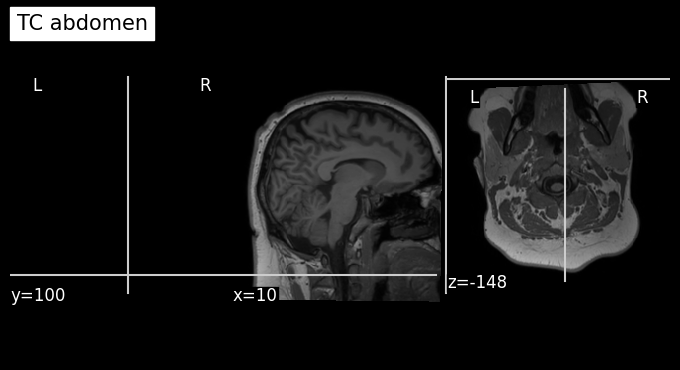

In [49]:
plotting.plot_anat(img1,title='TC abdomen',cut_coords=[10,100,-148]) #Sagital, Coronal, Axial
# plotting.plot_anat(img1,title='TC abdomen')

C:\Users\Pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


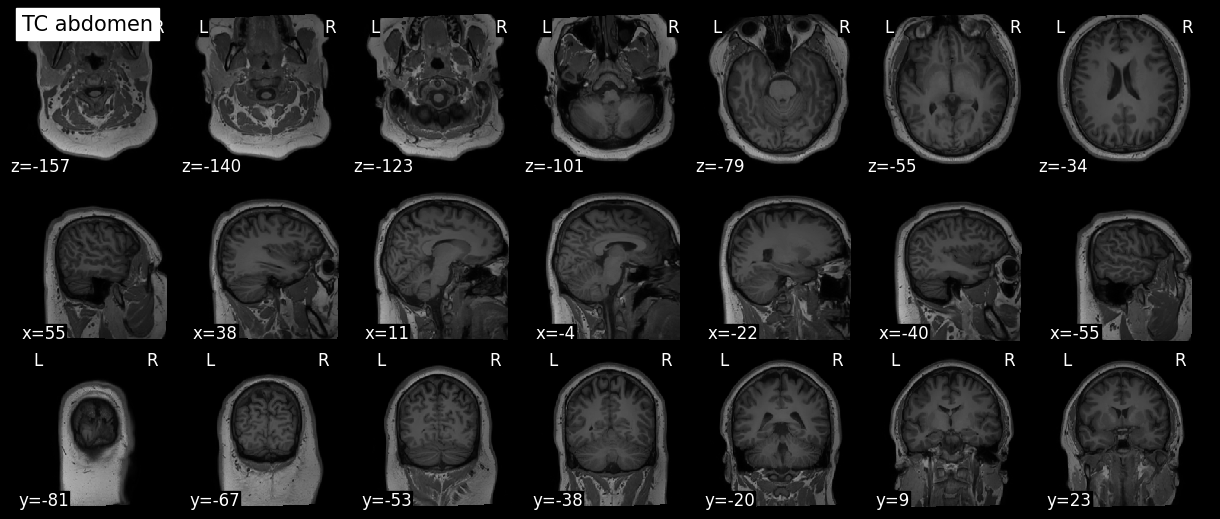

In [50]:
plotting.plot_anat(img1,
                title='TC abdomen',display_mode="mosaic")